In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
%matplotlib notebook
import copy
import csv
import glob
import sklearn.metrics as sm

In [2]:
#定义函数获取mape
def mape(yyy_true,yyy_pred):
    return np.mean(np.abs((yyy_pred-yyy_true)/yyy_pred))*100

In [3]:
FePc_CO = './CO-FeP-water.csv'
data_sets = (pd.read_csv(FePc_CO)).values
print(data_sets.shape,data_sets[0,2:29])
# FePc_CO = np.random.permutation(FePc_CO)
bad_data_set = np.where(data_sets[:,2:28]<0)[0]
bad_data_set = np.unique(bad_data_set)
data_sets = np.delete(data_sets,bad_data_set,axis=0)  #删除描述符小于0的样本
FePc_CO = data_sets[:,:]
print(FePc_CO.shape)
#用固定随机种子打乱二维数组的行顺序
np.random.seed(1)
np.random.shuffle(FePc_CO) #  打乱数据的第一维度
print(FePc_CO[0,:])
data_sets = FePc_CO

(375, 33) [1.0631710e+02 3.7500000e-02 1.6067000e+00 1.2096880e+02 6.0400000e-02
 1.0170000e+00 1.8513360e+02 1.9717000e+00 3.1245000e+00 3.2458180e+02
 1.2710100e+01 1.6871000e+00 3.5199950e+02 9.5712000e+00 2.8620000e-01
 5.4923080e+02 7.9768000e+00 7.0191000e+00 5.5241580e+02 1.1305900e+01
 4.3898000e+00 6.1353660e+02 3.0382700e+01 5.4885000e+00 1.9294498e+03
 1.0850777e+03 9.2627800e+01]
(375, 33)
[ 6.70000000e+01  7.00000000e+01  1.15702100e+02  3.57000000e-02
  1.76730000e+00  1.31048100e+02  1.40400000e-01  1.37350000e+00
  1.83730000e+02  1.38360000e+00  5.13330000e+00  3.21120900e+02
  1.15992000e+01  1.61240000e+00  3.60361100e+02  9.77540000e+00
  6.95900000e-01  5.27415900e+02  1.35021000e+01  6.18370000e+00
  5.61739400e+02  3.28700000e+00  4.53800000e-01  6.05895800e+02
  3.34429000e+01  1.94710000e+00  1.86905260e+03  1.10336050e+03
  1.00106400e+02 -1.11458326e+01  1.71601600e+00  1.18242700e+00
  1.67108124e+02]


In [4]:
x = data_sets[:,2:29]
y_uncomp = data_sets[:,31].reshape(-1,1)
print(x[0,:],y_uncomp[0,:])
standar_scaler = preprocessing.StandardScaler()                 # 特征数据标准化
x = standar_scaler.fit_transform(x)

scaler = preprocessing.StandardScaler().fit(y_uncomp.reshape(-1,1))#标准化到,scaler保存方差和均值,
y_scaled = preprocessing.scale(y_uncomp.reshape(-1,1))#下次标准化，按scaler2标准化到（mean_=0，var_=1）
y_inver = scaler.inverse_transform(y_scaled)#按scaler2回到原来参数

print(y_uncomp.shape,y_uncomp[:3],'\n'
      ,y_scaled.shape,y_scaled[:3],'\n','\n'
      ,y_inver.shape,y_inver[:3]
     )
data_sets_scaled = np.hstack((x,y_scaled))
print(data_sets_scaled.shape,data_sets_scaled[0,:])

[1.1570210e+02 3.5700000e-02 1.7673000e+00 1.3104810e+02 1.4040000e-01
 1.3735000e+00 1.8373000e+02 1.3836000e+00 5.1333000e+00 3.2112090e+02
 1.1599200e+01 1.6124000e+00 3.6036110e+02 9.7754000e+00 6.9590000e-01
 5.2741590e+02 1.3502100e+01 6.1837000e+00 5.6173940e+02 3.2870000e+00
 4.5380000e-01 6.0589580e+02 3.3442900e+01 1.9471000e+00 1.8690526e+03
 1.1033605e+03 1.0010640e+02] [1.182427]
(375, 1) [[1.182427]
 [1.180915]
 [1.172869]] 
 (375, 1) [[ 1.1824976 ]
 [ 0.81224594]
 [-1.15802181]] 
 
 (375, 1) [[1.182427]
 [1.180915]
 [1.172869]]
(375, 28) [ 0.94891398 -0.63117904 -0.05245378  1.36125786  0.78347601 -0.5364079
 -0.32828879 -0.20108796  0.22714936  0.00559119  0.08953665  2.16392709
  0.46959201 -1.82192639 -0.26406248 -0.57983016  0.21053863  1.7507702
  0.26133133 -1.26763446 -1.3881452  -0.50968802  0.05711359 -1.3900995
 -1.15958694 -0.69719897 -0.32213676  1.1824976 ]


In [5]:
data_sets = data_sets_scaled
k_fold = 5
one_fold = int(data_sets.shape[0]/k_fold)
redundant = data_sets.shape[0] - one_fold*k_fold
print(one_fold,'       ',redundant)

75         0


In [6]:
data_sets_1 = data_sets[0:75,:]
data_sets_2 = data_sets[75:150,:]
data_sets_3 = data_sets[150:225,:]
data_sets_4 = data_sets[225:300,:]
data_sets_5 = data_sets[300:375,:]
print(data_sets_1.shape,data_sets_2.shape,data_sets_3.shape,data_sets_4.shape,data_sets_5.shape)
data_sets_new = np.vstack((data_sets_1,data_sets_2))
data_sets_new = np.vstack((data_sets_new,data_sets_3))
data_sets_new = np.vstack((data_sets_new,data_sets_4))
data_sets_new = np.vstack((data_sets_new,data_sets_5))
# print(data_sets_new.shape,data_sets_new[0,:])
print((data_sets == data_sets_new).all())

(75, 28) (75, 28) (75, 28) (75, 28) (75, 28)
True


In [7]:
data_sets_train = np.vstack((data_sets_2,data_sets_3))
data_sets_train = np.vstack((data_sets_train,data_sets_4))
data_sets_train = np.vstack((data_sets_train,data_sets_5))
data_sets_test  = data_sets_1
print(data_sets_train.shape,data_sets_test.shape)
x_train = data_sets_train[:,:-1]
y_train = data_sets_train[:,-1]
x_test = data_sets_test[:,:-1]
y_test = data_sets_test[:,-1]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(300, 28) (75, 28)
(300, 27) (300,) (75, 27) (75,)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(x_train.shape[1],),activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.03),name="layer1"),
#     tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.02),name="layer2"),
#     tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(32, activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.01),name="layer3"),

    tf.keras.layers.Dense(1,name="layer4")
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 128)               3584      
_________________________________________________________________
layer2 (Dense)               (None, 64)                8256      
_________________________________________________________________
layer3 (Dense)               (None, 32)                2080      
_________________________________________________________________
layer4 (Dense)               (None, 1)                 33        
Total params: 13,953
Trainable params: 13,953
Non-trainable params: 0
_________________________________________________________________


In [9]:
#模型搭建好之后就会给每个参数赋予初值
layer0 = model.layers[0].get_weights()    #这里的layer0对应模型中name里面的layer1
# print(layer0[0].shape)       #权重
# print(layer0[1].shape)       #偏置
print(layer0[0][0,0],layer0[1][0])        #每次初始化的权重值都不一样
# print(layer0[1])   
# print(model.layers[1].get_weights)
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

0.19074404 0.0
0.16742778 0.0
0.16663289 0.0


In [10]:
# 一种调整学习率的方法，当指标停止提升时，降低学习速率。
Reduce=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,
                         verbose=1,
                         mode='auto',
                         min_delta=0.000001,
                         cooldown=0,
                         min_lr=0)
# 学习率指数衰减
exponential_decay = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.05
                                                                    , decay_steps=50
                                                                    , decay_rate=0.9
                                                                    )

In [11]:
#加载模型，加载完模型后必须重新compile一次，如果不compile而直接fit，模型参数不会优化
model.load_weights( "../CO-FeP/C-O/C-O.ckpt")
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0]) 

-1.5298248e-36 -0.37829068
-5.781185e-13 -0.3982663
-0.31016365 -0.45330006


In [12]:
checkpoint_save_path_transfer_fix_last_layer="./C-O_bond/transfer_fix_last_layer/checkpoint.ckpt"   
#读取模型
if os.path.exists(checkpoint_save_path_transfer_fix_last_layer + '.index'):
    print('- - - - - - - - - - - -load the model- - - - - - - - - - - -')
    model.load_weights(checkpoint_save_path_transfer_fix_last_layer)
#在每个训练期（epoch）后保存模型
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path_transfer_fix_last_layer,
                                                save_weights_only=True,
                                                save_best_only=True)      

In [13]:
#把除最后一层外的神经网络层固定优化，这里固定住后面要重新编译模型，不然这部分的参数不起作用
for layer in model.layers[:-1]:
    layer.trainable = False
    
#加载模型，加载完模型后必须重新compile一次，如果不compile而直接fit，模型参数不会优化
model.compile(optimizer=tf.keras.optimizers.Adam(exponential_decay)
              ,loss='mse'
#               ,metrics=['mae','lr_mertic']
             )    
history = model.fit(x_train, y_train, batch_size=y_train.shape[0], epochs=1000, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback]
#                     ,callbacks=[reduce_lr]
                   )
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0759 - val_loss: 0.0729
Epoch 2/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 3/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 4/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 5/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 6/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 7/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 8/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 9/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 10/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 11/10

Epoch 83/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 84/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 85/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 86/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 87/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 88/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 89/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 90/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 91/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 92/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0759 - val_loss: 0.0729


1/1 [==============================] - 0s 40ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 165/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 166/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 167/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 168/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 169/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 170/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 171/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 172/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 173/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch

1/1 [==============================] - 0s 35ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 246/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 247/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 248/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 249/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 250/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 251/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 252/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 253/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 254/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch

1/1 [==============================] - 0s 43ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 327/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 328/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 329/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 330/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 331/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 332/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 333/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 334/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 335/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch

1/1 [==============================] - 0s 54ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 408/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 409/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 410/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 411/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 412/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 413/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 414/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 415/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 416/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch

1/1 [==============================] - 0s 55ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 489/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 490/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 491/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 492/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 493/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 494/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 495/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 496/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 497/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch

1/1 [==============================] - 0s 56ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 570/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 571/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 572/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 573/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 574/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 575/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 576/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 577/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch 578/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0759 - val_loss: 0.0729
Epoch

1/1 [==============================] - 0s 52ms/step - loss: 0.0758 - val_loss: 0.0729
Epoch 651/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.0758 - val_loss: 0.0729
Epoch 652/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0758 - val_loss: 0.0729
Epoch 653/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0758 - val_loss: 0.0729
Epoch 654/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0758 - val_loss: 0.0729
Epoch 655/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0758 - val_loss: 0.0729
Epoch 656/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0758 - val_loss: 0.0729
Epoch 657/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.0758 - val_loss: 0.0729
Epoch 658/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.0758 - val_loss: 0.0729
Epoch 659/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.0758 - val_loss: 0.0729
Epoch

1/1 [==============================] - 0s 49ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 732/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 733/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 734/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 735/1000
1/1 [==============================] - 0s 81ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 736/1000
1/1 [==============================] - 0s 85ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 737/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 738/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 739/1000
1/1 [==============================] - 0s 77ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 740/1000
1/1 [==============================] - 0s 81ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch

Epoch 812/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 813/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 814/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 815/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 816/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 817/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 818/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 819/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 820/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 821/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0758 - val_los

Epoch 893/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 894/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 895/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 896/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 897/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 898/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 899/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 900/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 901/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 902/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0758 - val_los

1/1 [==============================] - 0s 50ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 975/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 976/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 977/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 978/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 979/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 980/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 981/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 982/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 983/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch

In [14]:
checkpoint_save_path_transfer_free="./C-O_bond/transfer_free/checkpoint.ckpt"   
#读取模型
if os.path.exists(checkpoint_save_path_transfer_free + '.index'):
    print('- - - - - - - - - - - -load the model- - - - - - - - - - - -')
    model.load_weights(checkpoint_save_path_transfer_free)
#保存模型
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path_transfer_free,
                                                save_weights_only=True,
                                                save_best_only=True)

In [15]:
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

-1.5298248e-36 -0.37829068
-5.781185e-13 -0.3982663
-0.31016365 -0.4531991


In [16]:
#前面的模型是只放开最后一层优化模型参数，这个模型是放开所有的参数进行微调
model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='mse')

history = model.fit(x_train, y_train, batch_size=y_train.shape[0], epochs=10000, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback]
#                     ,callbacks=[reduce_lr]
                   )
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

Epoch 1/10000
1/1 [==============================] - 1s 583ms/step - loss: 0.0758 - val_loss: 0.0728
Epoch 2/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0757 - val_loss: 0.0727
Epoch 3/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0756 - val_loss: 0.0726
Epoch 4/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0755 - val_loss: 0.0725
Epoch 5/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0754 - val_loss: 0.0724
Epoch 6/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0753 - val_loss: 0.0723
Epoch 7/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0752 - val_loss: 0.0722
Epoch 8/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0751 - val_loss: 0.0721
Epoch 9/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0751 - val_loss: 0.0721
Epoch 10/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0750 - val_loss: 0.072

1/1 [==============================] - 0s 48ms/step - loss: 0.0704 - val_loss: 0.0684
Epoch 64/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0703 - val_loss: 0.0684
Epoch 65/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0702 - val_loss: 0.0683
Epoch 66/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0701 - val_loss: 0.0683
Epoch 67/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0700 - val_loss: 0.0682
Epoch 68/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0700 - val_loss: 0.0682
Epoch 69/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0699 - val_loss: 0.0681
Epoch 70/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0698 - val_loss: 0.0681
Epoch 71/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0697 - val_loss: 0.0680
Epoch 72/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0696 - val_loss: 0.0679
Epoch

Epoch 144/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0643 - val_loss: 0.0643
Epoch 145/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0642 - val_loss: 0.0642
Epoch 146/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0642 - val_loss: 0.0642
Epoch 147/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0641 - val_loss: 0.0642
Epoch 148/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0640 - val_loss: 0.0641
Epoch 149/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0640 - val_loss: 0.0641
Epoch 150/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0639 - val_loss: 0.0640
Epoch 151/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0638 - val_loss: 0.0640
Epoch 152/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0638 - val_loss: 0.0639
Epoch 153/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0637

1/1 [==============================] - 0s 84ms/step - loss: 0.0593 - val_loss: 0.0608
Epoch 225/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0593 - val_loss: 0.0607
Epoch 226/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0592 - val_loss: 0.0607
Epoch 227/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0591 - val_loss: 0.0607
Epoch 228/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0591 - val_loss: 0.0606
Epoch 229/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0590 - val_loss: 0.0606
Epoch 230/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0590 - val_loss: 0.0605
Epoch 231/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0589 - val_loss: 0.0605
Epoch 232/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0589 - val_loss: 0.0605
Epoch 233/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0588 - val_loss: 0.0

1/1 [==============================] - 0s 55ms/step - loss: 0.0551 - val_loss: 0.0578
Epoch 305/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0551 - val_loss: 0.0578
Epoch 306/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0551 - val_loss: 0.0578
Epoch 307/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0550 - val_loss: 0.0577
Epoch 308/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0550 - val_loss: 0.0577
Epoch 309/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0549 - val_loss: 0.0577
Epoch 310/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0549 - val_loss: 0.0576
Epoch 311/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0548 - val_loss: 0.0576
Epoch 312/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0548 - val_loss: 0.0576
Epoch 313/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0547 - val_loss: 0.0

1/1 [==============================] - 0s 103ms/step - loss: 0.0517 - val_loss: 0.0554
Epoch 385/10000
1/1 [==============================] - 0s 92ms/step - loss: 0.0517 - val_loss: 0.0553
Epoch 386/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0516 - val_loss: 0.0553
Epoch 387/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0516 - val_loss: 0.0553
Epoch 388/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0516 - val_loss: 0.0553
Epoch 389/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0515 - val_loss: 0.0552
Epoch 390/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0515 - val_loss: 0.0552
Epoch 391/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0514 - val_loss: 0.0552
Epoch 392/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0514 - val_loss: 0.0551
Epoch 393/10000
1/1 [==============================] - 0s 102ms/step - loss: 0.0514 - val_loss: 0

1/1 [==============================] - 0s 66ms/step - loss: 0.0489 - val_loss: 0.0533
Epoch 465/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0489 - val_loss: 0.0533
Epoch 466/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0489 - val_loss: 0.0533
Epoch 467/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0488 - val_loss: 0.0533
Epoch 468/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0488 - val_loss: 0.0533
Epoch 469/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0488 - val_loss: 0.0532
Epoch 470/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0487 - val_loss: 0.0532
Epoch 471/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0487 - val_loss: 0.0532
Epoch 472/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0487 - val_loss: 0.0532
Epoch 473/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0487 - val_loss: 0.0

1/1 [==============================] - 0s 43ms/step - loss: 0.0467 - val_loss: 0.0517
Epoch 545/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0467 - val_loss: 0.0517
Epoch 546/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0466 - val_loss: 0.0517
Epoch 547/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0466 - val_loss: 0.0517
Epoch 548/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0466 - val_loss: 0.0516
Epoch 549/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0466 - val_loss: 0.0516
Epoch 550/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0465 - val_loss: 0.0516
Epoch 551/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0465 - val_loss: 0.0516
Epoch 552/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0465 - val_loss: 0.0516
Epoch 553/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0465 - val_loss: 0.0

1/1 [==============================] - 0s 66ms/step - loss: 0.0448 - val_loss: 0.0504
Epoch 625/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0448 - val_loss: 0.0503
Epoch 626/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0448 - val_loss: 0.0503
Epoch 627/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0448 - val_loss: 0.0503
Epoch 628/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0448 - val_loss: 0.0503
Epoch 629/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0447 - val_loss: 0.0503
Epoch 630/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0447 - val_loss: 0.0503
Epoch 631/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0447 - val_loss: 0.0502
Epoch 632/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0447 - val_loss: 0.0502
Epoch 633/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0447 - val_loss: 0.0

1/1 [==============================] - 0s 54ms/step - loss: 0.0433 - val_loss: 0.0492
Epoch 705/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0433 - val_loss: 0.0492
Epoch 706/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0433 - val_loss: 0.0491
Epoch 707/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0433 - val_loss: 0.0491
Epoch 708/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0433 - val_loss: 0.0491
Epoch 709/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0432 - val_loss: 0.0491
Epoch 710/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0432 - val_loss: 0.0491
Epoch 711/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0432 - val_loss: 0.0491
Epoch 712/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0432 - val_loss: 0.0491
Epoch 713/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0432 - val_loss: 0.0

1/1 [==============================] - 0s 74ms/step - loss: 0.0420 - val_loss: 0.0481
Epoch 785/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0420 - val_loss: 0.0481
Epoch 786/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0420 - val_loss: 0.0481
Epoch 787/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0420 - val_loss: 0.0481
Epoch 788/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0420 - val_loss: 0.0480
Epoch 789/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0420 - val_loss: 0.0480
Epoch 790/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0419 - val_loss: 0.0480
Epoch 791/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0419 - val_loss: 0.0480
Epoch 792/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0419 - val_loss: 0.0480
Epoch 793/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0419 - val_loss: 0.0

1/1 [==============================] - 0s 37ms/step - loss: 0.0409 - val_loss: 0.0471
Epoch 865/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0409 - val_loss: 0.0471
Epoch 866/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0409 - val_loss: 0.0471
Epoch 867/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0409 - val_loss: 0.0471
Epoch 868/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0409 - val_loss: 0.0470
Epoch 869/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0408 - val_loss: 0.0470
Epoch 870/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0408 - val_loss: 0.0470
Epoch 871/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0408 - val_loss: 0.0470
Epoch 872/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0408 - val_loss: 0.0470
Epoch 873/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0408 - val_loss: 0.0

1/1 [==============================] - 0s 39ms/step - loss: 0.0399 - val_loss: 0.0462
Epoch 945/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0399 - val_loss: 0.0462
Epoch 946/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0399 - val_loss: 0.0461
Epoch 947/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0399 - val_loss: 0.0461
Epoch 948/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0399 - val_loss: 0.0461
Epoch 949/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0399 - val_loss: 0.0461
Epoch 950/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0399 - val_loss: 0.0461
Epoch 951/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 952/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 953/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0398 - val_loss: 0.0

1/1 [==============================] - 0s 47ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 1025/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 1026/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 1027/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 1028/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 1029/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 1030/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 1031/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 1032/10000
1/1 [==============================] - 0s 88ms/step - loss: 0.0389 - val_loss: 0.0452
Epoch 1033/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0389 - val_

1/1 [==============================] - 0s 55ms/step - loss: 0.0382 - val_loss: 0.0445
Epoch 1104/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0382 - val_loss: 0.0445
Epoch 1105/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0382 - val_loss: 0.0445
Epoch 1106/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0382 - val_loss: 0.0445
Epoch 1107/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0382 - val_loss: 0.0444
Epoch 1108/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0382 - val_loss: 0.0444
Epoch 1109/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0382 - val_loss: 0.0444
Epoch 1110/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0382 - val_loss: 0.0444
Epoch 1111/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0382 - val_loss: 0.0444
Epoch 1112/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0381 - val_

1/1 [==============================] - 0s 53ms/step - loss: 0.0375 - val_loss: 0.0437
Epoch 1183/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.0375 - val_loss: 0.0437
Epoch 1184/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0375 - val_loss: 0.0437
Epoch 1185/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0375 - val_loss: 0.0437
Epoch 1186/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0375 - val_loss: 0.0437
Epoch 1187/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0374 - val_loss: 0.0437
Epoch 1188/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0374 - val_loss: 0.0437
Epoch 1189/10000
1/1 [==============================] - 0s 84ms/step - loss: 0.0374 - val_loss: 0.0436
Epoch 1190/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0374 - val_loss: 0.0436
Epoch 1191/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0374 - val_

1/1 [==============================] - 0s 41ms/step - loss: 0.0368 - val_loss: 0.0430
Epoch 1262/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0368 - val_loss: 0.0430
Epoch 1263/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0368 - val_loss: 0.0430
Epoch 1264/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0368 - val_loss: 0.0430
Epoch 1265/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0368 - val_loss: 0.0430
Epoch 1266/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0368 - val_loss: 0.0429
Epoch 1267/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0368 - val_loss: 0.0429
Epoch 1268/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0368 - val_loss: 0.0429
Epoch 1269/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0367 - val_loss: 0.0429
Epoch 1270/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0367 - val_

1/1 [==============================] - 0s 49ms/step - loss: 0.0362 - val_loss: 0.0423
Epoch 1341/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0362 - val_loss: 0.0423
Epoch 1342/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0362 - val_loss: 0.0423
Epoch 1343/10000
1/1 [==============================] - 0s 91ms/step - loss: 0.0362 - val_loss: 0.0423
Epoch 1344/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0361 - val_loss: 0.0423
Epoch 1345/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0361 - val_loss: 0.0423
Epoch 1346/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0361 - val_loss: 0.0422
Epoch 1347/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0361 - val_loss: 0.0422
Epoch 1348/10000
1/1 [==============================] - 0s 78ms/step - loss: 0.0361 - val_loss: 0.0422
Epoch 1349/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0361 - val_

1/1 [==============================] - 0s 55ms/step - loss: 0.0356 - val_loss: 0.0416
Epoch 1420/10000
1/1 [==============================] - 0s 84ms/step - loss: 0.0356 - val_loss: 0.0416
Epoch 1421/10000
1/1 [==============================] - 0s 84ms/step - loss: 0.0356 - val_loss: 0.0416
Epoch 1422/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.0356 - val_loss: 0.0416
Epoch 1423/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0356 - val_loss: 0.0416
Epoch 1424/10000
1/1 [==============================] - 0s 78ms/step - loss: 0.0355 - val_loss: 0.0416
Epoch 1425/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0355 - val_loss: 0.0416
Epoch 1426/10000
1/1 [==============================] - 0s 95ms/step - loss: 0.0355 - val_loss: 0.0416
Epoch 1427/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0355 - val_loss: 0.0416
Epoch 1428/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0355 - val_

1/1 [==============================] - 0s 43ms/step - loss: 0.0350 - val_loss: 0.0410
Epoch 1499/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0350 - val_loss: 0.0410
Epoch 1500/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0350 - val_loss: 0.0410
Epoch 1501/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0350 - val_loss: 0.0410
Epoch 1502/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0350 - val_loss: 0.0410
Epoch 1503/10000
1/1 [==============================] - 0s 83ms/step - loss: 0.0350 - val_loss: 0.0410
Epoch 1504/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0350 - val_loss: 0.0410
Epoch 1505/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0350 - val_loss: 0.0409
Epoch 1506/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0350 - val_loss: 0.0409
Epoch 1507/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0350 - val_

1/1 [==============================] - 0s 32ms/step - loss: 0.0345 - val_loss: 0.0404
Epoch 1578/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0345 - val_loss: 0.0404
Epoch 1579/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0345 - val_loss: 0.0404
Epoch 1580/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0345 - val_loss: 0.0404
Epoch 1581/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0345 - val_loss: 0.0404
Epoch 1582/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0345 - val_loss: 0.0404
Epoch 1583/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0345 - val_loss: 0.0403
Epoch 1584/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0345 - val_loss: 0.0403
Epoch 1585/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0344 - val_loss: 0.0403
Epoch 1586/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0344 - val_

1/1 [==============================] - 0s 44ms/step - loss: 0.0340 - val_loss: 0.0398
Epoch 1657/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0340 - val_loss: 0.0398
Epoch 1658/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0340 - val_loss: 0.0398
Epoch 1659/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0340 - val_loss: 0.0398
Epoch 1660/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0340 - val_loss: 0.0398
Epoch 1661/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0340 - val_loss: 0.0398
Epoch 1662/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0340 - val_loss: 0.0398
Epoch 1663/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0340 - val_loss: 0.0397
Epoch 1664/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0339 - val_loss: 0.0397
Epoch 1665/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0339 - val_

1/1 [==============================] - 0s 55ms/step - loss: 0.0335 - val_loss: 0.0392
Epoch 1736/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0335 - val_loss: 0.0392
Epoch 1737/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0335 - val_loss: 0.0392
Epoch 1738/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0335 - val_loss: 0.0392
Epoch 1739/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0335 - val_loss: 0.0392
Epoch 1740/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0335 - val_loss: 0.0392
Epoch 1741/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0335 - val_loss: 0.0392
Epoch 1742/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0335 - val_loss: 0.0392
Epoch 1743/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0335 - val_loss: 0.0392
Epoch 1744/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0335 - val_

1/1 [==============================] - 0s 54ms/step - loss: 0.0330 - val_loss: 0.0387
Epoch 1815/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0330 - val_loss: 0.0387
Epoch 1816/10000
1/1 [==============================] - 0s 87ms/step - loss: 0.0330 - val_loss: 0.0387
Epoch 1817/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0330 - val_loss: 0.0387
Epoch 1818/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0330 - val_loss: 0.0387
Epoch 1819/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0330 - val_loss: 0.0387
Epoch 1820/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0330 - val_loss: 0.0387
Epoch 1821/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0330 - val_loss: 0.0387
Epoch 1822/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0330 - val_loss: 0.0387
Epoch 1823/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0330 - val_

1/1 [==============================] - 0s 32ms/step - loss: 0.0326 - val_loss: 0.0382
Epoch 1894/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0326 - val_loss: 0.0382
Epoch 1895/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0326 - val_loss: 0.0382
Epoch 1896/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0326 - val_loss: 0.0381
Epoch 1897/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0326 - val_loss: 0.0381
Epoch 1898/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0326 - val_loss: 0.0381
Epoch 1899/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0325 - val_loss: 0.0381
Epoch 1900/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0325 - val_loss: 0.0381
Epoch 1901/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0325 - val_loss: 0.0381
Epoch 1902/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0325 - val_

1/1 [==============================] - 0s 37ms/step - loss: 0.0322 - val_loss: 0.0376
Epoch 1973/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0321 - val_loss: 0.0376
Epoch 1974/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0321 - val_loss: 0.0376
Epoch 1975/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0321 - val_loss: 0.0376
Epoch 1976/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0321 - val_loss: 0.0376
Epoch 1977/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0321 - val_loss: 0.0376
Epoch 1978/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0321 - val_loss: 0.0376
Epoch 1979/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0321 - val_loss: 0.0376
Epoch 1980/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0321 - val_loss: 0.0376
Epoch 1981/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0321 - val_

1/1 [==============================] - 0s 51ms/step - loss: 0.0317 - val_loss: 0.0371
Epoch 2052/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0317 - val_loss: 0.0371
Epoch 2053/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0317 - val_loss: 0.0371
Epoch 2054/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0317 - val_loss: 0.0371
Epoch 2055/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0317 - val_loss: 0.0371
Epoch 2056/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0317 - val_loss: 0.0371
Epoch 2057/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0317 - val_loss: 0.0371
Epoch 2058/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0317 - val_loss: 0.0371
Epoch 2059/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0317 - val_loss: 0.0370
Epoch 2060/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0317 - val_

1/1 [==============================] - 0s 65ms/step - loss: 0.0313 - val_loss: 0.0366
Epoch 2131/10000
1/1 [==============================] - 0s 89ms/step - loss: 0.0313 - val_loss: 0.0365
Epoch 2132/10000
1/1 [==============================] - 0s 78ms/step - loss: 0.0313 - val_loss: 0.0365
Epoch 2133/10000
1/1 [==============================] - 0s 93ms/step - loss: 0.0313 - val_loss: 0.0365
Epoch 2134/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0313 - val_loss: 0.0365
Epoch 2135/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0313 - val_loss: 0.0365
Epoch 2136/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0313 - val_loss: 0.0365
Epoch 2137/10000
1/1 [==============================] - 0s 118ms/step - loss: 0.0313 - val_loss: 0.0365
Epoch 2138/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0313 - val_loss: 0.0365
Epoch 2139/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0313 - val

Epoch 2209/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0310 - val_loss: 0.0360
Epoch 2210/10000
1/1 [==============================] - 0s 105ms/step - loss: 0.0310 - val_loss: 0.0360
Epoch 2211/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0310 - val_loss: 0.0360
Epoch 2212/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0310 - val_loss: 0.0360
Epoch 2213/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0310 - val_loss: 0.0360
Epoch 2214/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0309 - val_loss: 0.0360
Epoch 2215/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0309 - val_loss: 0.0360
Epoch 2216/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0309 - val_loss: 0.0359
Epoch 2217/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0309 - val_loss: 0.0359
Epoch 2218/10000
1/1 [==============================] - 0s 56ms/step - l

1/1 [==============================] - 0s 31ms/step - loss: 0.0306 - val_loss: 0.0355
Epoch 2289/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0306 - val_loss: 0.0355
Epoch 2290/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0306 - val_loss: 0.0354
Epoch 2291/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0306 - val_loss: 0.0354
Epoch 2292/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0306 - val_loss: 0.0354
Epoch 2293/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0306 - val_loss: 0.0354
Epoch 2294/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0306 - val_loss: 0.0354
Epoch 2295/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0306 - val_loss: 0.0354
Epoch 2296/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0306 - val_loss: 0.0354
Epoch 2297/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0306 - val_

1/1 [==============================] - 0s 32ms/step - loss: 0.0303 - val_loss: 0.0349
Epoch 2368/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0303 - val_loss: 0.0349
Epoch 2369/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0303 - val_loss: 0.0349
Epoch 2370/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0303 - val_loss: 0.0349
Epoch 2371/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0303 - val_loss: 0.0349
Epoch 2372/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0303 - val_loss: 0.0349
Epoch 2373/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0302 - val_loss: 0.0349
Epoch 2374/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0302 - val_loss: 0.0349
Epoch 2375/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0302 - val_loss: 0.0349
Epoch 2376/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0302 - val_

1/1 [==============================] - 0s 48ms/step - loss: 0.0299 - val_loss: 0.0344
Epoch 2447/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0299 - val_loss: 0.0344
Epoch 2448/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0299 - val_loss: 0.0344
Epoch 2449/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0299 - val_loss: 0.0344
Epoch 2450/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0299 - val_loss: 0.0344
Epoch 2451/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0299 - val_loss: 0.0344
Epoch 2452/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0299 - val_loss: 0.0344
Epoch 2453/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0299 - val_loss: 0.0344
Epoch 2454/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0299 - val_loss: 0.0344
Epoch 2455/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.0299 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.0296 - val_loss: 0.0339
Epoch 2526/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0296 - val_loss: 0.0339
Epoch 2527/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0296 - val_loss: 0.0339
Epoch 2528/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0296 - val_loss: 0.0339
Epoch 2529/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0296 - val_loss: 0.0339
Epoch 2530/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0296 - val_loss: 0.0339
Epoch 2531/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0296 - val_loss: 0.0339
Epoch 2532/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0296 - val_loss: 0.0339
Epoch 2533/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0296 - val_loss: 0.0339
Epoch 2534/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0296 - val_

1/1 [==============================] - 0s 40ms/step - loss: 0.0293 - val_loss: 0.0335
Epoch 2605/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0293 - val_loss: 0.0335
Epoch 2606/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0293 - val_loss: 0.0335
Epoch 2607/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0293 - val_loss: 0.0335
Epoch 2608/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0293 - val_loss: 0.0334
Epoch 2609/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0293 - val_loss: 0.0334
Epoch 2610/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0293 - val_loss: 0.0334
Epoch 2611/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0293 - val_loss: 0.0334
Epoch 2612/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0293 - val_loss: 0.0334
Epoch 2613/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0293 - val_

1/1 [==============================] - 0s 65ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 2684/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 2685/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 2686/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 2687/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 2688/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 2689/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 2690/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 2691/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 2692/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0290 - val_

1/1 [==============================] - 0s 85ms/step - loss: 0.0287 - val_loss: 0.0326
Epoch 2763/10000
1/1 [==============================] - 0s 84ms/step - loss: 0.0287 - val_loss: 0.0326
Epoch 2764/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0287 - val_loss: 0.0326
Epoch 2765/10000
1/1 [==============================] - 0s 96ms/step - loss: 0.0287 - val_loss: 0.0326
Epoch 2766/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0287 - val_loss: 0.0325
Epoch 2767/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0287 - val_loss: 0.0325
Epoch 2768/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0287 - val_loss: 0.0325
Epoch 2769/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0287 - val_loss: 0.0325
Epoch 2770/10000
1/1 [==============================] - 0s 81ms/step - loss: 0.0287 - val_loss: 0.0325
Epoch 2771/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0287 - val_

1/1 [==============================] - 0s 36ms/step - loss: 0.0285 - val_loss: 0.0321
Epoch 2842/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0285 - val_loss: 0.0321
Epoch 2843/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0285 - val_loss: 0.0321
Epoch 2844/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0285 - val_loss: 0.0321
Epoch 2845/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0285 - val_loss: 0.0321
Epoch 2846/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0285 - val_loss: 0.0321
Epoch 2847/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0285 - val_loss: 0.0321
Epoch 2848/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0285 - val_loss: 0.0321
Epoch 2849/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0285 - val_loss: 0.0321
Epoch 2850/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0284 - val_

1/1 [==============================] - 0s 53ms/step - loss: 0.0282 - val_loss: 0.0317
Epoch 2921/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0282 - val_loss: 0.0317
Epoch 2922/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0282 - val_loss: 0.0317
Epoch 2923/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0282 - val_loss: 0.0317
Epoch 2924/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0282 - val_loss: 0.0317
Epoch 2925/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0282 - val_loss: 0.0317
Epoch 2926/10000
1/1 [==============================] - 0s 85ms/step - loss: 0.0282 - val_loss: 0.0317
Epoch 2927/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0282 - val_loss: 0.0317
Epoch 2928/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0282 - val_loss: 0.0317
Epoch 2929/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0282 - val_

1/1 [==============================] - 0s 58ms/step - loss: 0.0280 - val_loss: 0.0313
Epoch 3000/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0280 - val_loss: 0.0313
Epoch 3001/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0280 - val_loss: 0.0313
Epoch 3002/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0280 - val_loss: 0.0313
Epoch 3003/10000
1/1 [==============================] - 0s 95ms/step - loss: 0.0280 - val_loss: 0.0313
Epoch 3004/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0280 - val_loss: 0.0313
Epoch 3005/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0280 - val_loss: 0.0313
Epoch 3006/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0280 - val_loss: 0.0313
Epoch 3007/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0280 - val_loss: 0.0313
Epoch 3008/10000
1/1 [==============================] - 0s 110ms/step - loss: 0.0279 - val

1/1 [==============================] - 0s 46ms/step - loss: 0.0277 - val_loss: 0.0309
Epoch 3079/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0277 - val_loss: 0.0309
Epoch 3080/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0277 - val_loss: 0.0309
Epoch 3081/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0277 - val_loss: 0.0309
Epoch 3082/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0277 - val_loss: 0.0309
Epoch 3083/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0277 - val_loss: 0.0309
Epoch 3084/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0277 - val_loss: 0.0309
Epoch 3085/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0277 - val_loss: 0.0309
Epoch 3086/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0277 - val_loss: 0.0309
Epoch 3087/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0277 - val_

1/1 [==============================] - 0s 33ms/step - loss: 0.0275 - val_loss: 0.0306
Epoch 3158/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0275 - val_loss: 0.0306
Epoch 3159/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0275 - val_loss: 0.0306
Epoch 3160/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0275 - val_loss: 0.0306
Epoch 3161/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0275 - val_loss: 0.0306
Epoch 3162/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0275 - val_loss: 0.0306
Epoch 3163/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0275 - val_loss: 0.0306
Epoch 3164/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0275 - val_loss: 0.0305
Epoch 3165/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0275 - val_loss: 0.0305
Epoch 3166/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0275 - val_

1/1 [==============================] - 0s 71ms/step - loss: 0.0273 - val_loss: 0.0302
Epoch 3237/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0273 - val_loss: 0.0302
Epoch 3238/10000
1/1 [==============================] - 0s 83ms/step - loss: 0.0273 - val_loss: 0.0302
Epoch 3239/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0273 - val_loss: 0.0302
Epoch 3240/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0273 - val_loss: 0.0302
Epoch 3241/10000
1/1 [==============================] - 0s 85ms/step - loss: 0.0273 - val_loss: 0.0302
Epoch 3242/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0273 - val_loss: 0.0302
Epoch 3243/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0273 - val_loss: 0.0302
Epoch 3244/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0273 - val_loss: 0.0302
Epoch 3245/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0273 - val_

1/1 [==============================] - 0s 48ms/step - loss: 0.0271 - val_loss: 0.0299
Epoch 3316/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0271 - val_loss: 0.0299
Epoch 3317/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0271 - val_loss: 0.0299
Epoch 3318/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0271 - val_loss: 0.0299
Epoch 3319/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0271 - val_loss: 0.0299
Epoch 3320/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0271 - val_loss: 0.0299
Epoch 3321/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0271 - val_loss: 0.0299
Epoch 3322/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0271 - val_loss: 0.0298
Epoch 3323/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0271 - val_loss: 0.0298
Epoch 3324/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0271 - val_

1/1 [==============================] - 0s 46ms/step - loss: 0.0269 - val_loss: 0.0295
Epoch 3395/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0269 - val_loss: 0.0295
Epoch 3396/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0269 - val_loss: 0.0295
Epoch 3397/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0269 - val_loss: 0.0295
Epoch 3398/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0269 - val_loss: 0.0295
Epoch 3399/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0269 - val_loss: 0.0295
Epoch 3400/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0269 - val_loss: 0.0295
Epoch 3401/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0269 - val_loss: 0.0295
Epoch 3402/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0269 - val_loss: 0.0295
Epoch 3403/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0269 - val_

1/1 [==============================] - 0s 43ms/step - loss: 0.0267 - val_loss: 0.0292
Epoch 3474/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0267 - val_loss: 0.0292
Epoch 3475/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0267 - val_loss: 0.0292
Epoch 3476/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0267 - val_loss: 0.0292
Epoch 3477/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0267 - val_loss: 0.0292
Epoch 3478/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0267 - val_loss: 0.0292
Epoch 3479/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0267 - val_loss: 0.0292
Epoch 3480/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0267 - val_loss: 0.0292
Epoch 3481/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0267 - val_loss: 0.0292
Epoch 3482/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0267 - val_

1/1 [==============================] - 0s 39ms/step - loss: 0.0265 - val_loss: 0.0289
Epoch 3553/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0265 - val_loss: 0.0289
Epoch 3554/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0265 - val_loss: 0.0289
Epoch 3555/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0265 - val_loss: 0.0289
Epoch 3556/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0265 - val_loss: 0.0289
Epoch 3557/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0265 - val_loss: 0.0289
Epoch 3558/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0265 - val_loss: 0.0289
Epoch 3559/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0265 - val_loss: 0.0289
Epoch 3560/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0265 - val_loss: 0.0289
Epoch 3561/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0265 - val_

1/1 [==============================] - 0s 55ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 3632/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 3633/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 3634/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 3635/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 3636/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 3637/10000
1/1 [==============================] - ETA: 0s - loss: 0.026 - 0s 77ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 3638/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 3639/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 3640/10000
1/1 [==============================] - 0s 55ms/st

1/1 [==============================] - 0s 42ms/step - loss: 0.0261 - val_loss: 0.0283
Epoch 3711/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0261 - val_loss: 0.0283
Epoch 3712/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0261 - val_loss: 0.0283
Epoch 3713/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0261 - val_loss: 0.0283
Epoch 3714/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0261 - val_loss: 0.0283
Epoch 3715/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0261 - val_loss: 0.0283
Epoch 3716/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0261 - val_loss: 0.0283
Epoch 3717/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0261 - val_loss: 0.0283
Epoch 3718/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0261 - val_loss: 0.0283
Epoch 3719/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.0261 - val_

1/1 [==============================] - 0s 52ms/step - loss: 0.0260 - val_loss: 0.0280
Epoch 3790/10000
1/1 [==============================] - ETA: 0s - loss: 0.026 - 0s 48ms/step - loss: 0.0260 - val_loss: 0.0280
Epoch 3791/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0260 - val_loss: 0.0280
Epoch 3792/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0260 - val_loss: 0.0280
Epoch 3793/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0259 - val_loss: 0.0280
Epoch 3794/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0259 - val_loss: 0.0280
Epoch 3795/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0259 - val_loss: 0.0280
Epoch 3796/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0259 - val_loss: 0.0280
Epoch 3797/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0259 - val_loss: 0.0280
Epoch 3798/10000
1/1 [==============================] - 0s 40ms/st

1/1 [==============================] - 0s 52ms/step - loss: 0.0258 - val_loss: 0.0278
Epoch 3869/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0258 - val_loss: 0.0278
Epoch 3870/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0258 - val_loss: 0.0278
Epoch 3871/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0258 - val_loss: 0.0278
Epoch 3872/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0258 - val_loss: 0.0278
Epoch 3873/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0258 - val_loss: 0.0277
Epoch 3874/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0258 - val_loss: 0.0277
Epoch 3875/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0258 - val_loss: 0.0277
Epoch 3876/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0258 - val_loss: 0.0277
Epoch 3877/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0258 - val_

1/1 [==============================] - 0s 37ms/step - loss: 0.0256 - val_loss: 0.0275
Epoch 3948/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0256 - val_loss: 0.0275
Epoch 3949/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0256 - val_loss: 0.0275
Epoch 3950/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0256 - val_loss: 0.0275
Epoch 3951/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0256 - val_loss: 0.0275
Epoch 3952/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0256 - val_loss: 0.0275
Epoch 3953/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0256 - val_loss: 0.0275
Epoch 3954/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0256 - val_loss: 0.0275
Epoch 3955/10000
1/1 [==============================] - 0s 84ms/step - loss: 0.0256 - val_loss: 0.0275
Epoch 3956/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0256 - val_

1/1 [==============================] - 0s 50ms/step - loss: 0.0255 - val_loss: 0.0273
Epoch 4027/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0255 - val_loss: 0.0273
Epoch 4028/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0255 - val_loss: 0.0273
Epoch 4029/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0255 - val_loss: 0.0273
Epoch 4030/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0255 - val_loss: 0.0273
Epoch 4031/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0255 - val_loss: 0.0272
Epoch 4032/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0255 - val_loss: 0.0272
Epoch 4033/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0255 - val_loss: 0.0272
Epoch 4034/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0255 - val_loss: 0.0272
Epoch 4035/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0255 - val_

1/1 [==============================] - 0s 49ms/step - loss: 0.0253 - val_loss: 0.0270
Epoch 4106/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0253 - val_loss: 0.0270
Epoch 4107/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0253 - val_loss: 0.0270
Epoch 4108/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0253 - val_loss: 0.0270
Epoch 4109/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0253 - val_loss: 0.0270
Epoch 4110/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0253 - val_loss: 0.0270
Epoch 4111/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0253 - val_loss: 0.0270
Epoch 4112/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0253 - val_loss: 0.0270
Epoch 4113/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0253 - val_loss: 0.0270
Epoch 4114/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0253 - val_

1/1 [==============================] - 0s 35ms/step - loss: 0.0252 - val_loss: 0.0268
Epoch 4185/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0252 - val_loss: 0.0268
Epoch 4186/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0252 - val_loss: 0.0268
Epoch 4187/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0252 - val_loss: 0.0268
Epoch 4188/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0252 - val_loss: 0.0268
Epoch 4189/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0252 - val_loss: 0.0268
Epoch 4190/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0252 - val_loss: 0.0268
Epoch 4191/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0252 - val_loss: 0.0268
Epoch 4192/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0252 - val_loss: 0.0268
Epoch 4193/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0252 - val_

1/1 [==============================] - 0s 46ms/step - loss: 0.0251 - val_loss: 0.0266
Epoch 4264/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0251 - val_loss: 0.0266
Epoch 4265/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0251 - val_loss: 0.0266
Epoch 4266/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0251 - val_loss: 0.0266
Epoch 4267/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0251 - val_loss: 0.0266
Epoch 4268/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0251 - val_loss: 0.0266
Epoch 4269/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0251 - val_loss: 0.0266
Epoch 4270/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0251 - val_loss: 0.0266
Epoch 4271/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0251 - val_loss: 0.0266
Epoch 4272/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0251 - val_

1/1 [==============================] - 0s 46ms/step - loss: 0.0250 - val_loss: 0.0264
Epoch 4343/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0250 - val_loss: 0.0264
Epoch 4344/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0250 - val_loss: 0.0264
Epoch 4345/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0250 - val_loss: 0.0264
Epoch 4346/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0249 - val_loss: 0.0264
Epoch 4347/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0249 - val_loss: 0.0264
Epoch 4348/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0249 - val_loss: 0.0264
Epoch 4349/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0249 - val_loss: 0.0264
Epoch 4350/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0249 - val_loss: 0.0264
Epoch 4351/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0249 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 4422/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 4423/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 4424/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 4425/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 4426/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 4427/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 4428/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 4429/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0248 - val_loss: 0.0262
Epoch 4430/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0248 - val_

1/1 [==============================] - 0s 36ms/step - loss: 0.0247 - val_loss: 0.0260
Epoch 4501/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0247 - val_loss: 0.0260
Epoch 4502/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0247 - val_loss: 0.0260
Epoch 4503/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0247 - val_loss: 0.0260
Epoch 4504/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0247 - val_loss: 0.0260
Epoch 4505/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0247 - val_loss: 0.0260
Epoch 4506/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0247 - val_loss: 0.0260
Epoch 4507/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0247 - val_loss: 0.0260
Epoch 4508/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0247 - val_loss: 0.0260
Epoch 4509/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0247 - val_

1/1 [==============================] - 0s 48ms/step - loss: 0.0246 - val_loss: 0.0258
Epoch 4580/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0246 - val_loss: 0.0258
Epoch 4581/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0246 - val_loss: 0.0258
Epoch 4582/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0246 - val_loss: 0.0258
Epoch 4583/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0246 - val_loss: 0.0258
Epoch 4584/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.0246 - val_loss: 0.0258
Epoch 4585/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0246 - val_loss: 0.0258
Epoch 4586/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0246 - val_loss: 0.0258
Epoch 4587/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0246 - val_loss: 0.0258
Epoch 4588/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0246 - val_

1/1 [==============================] - 0s 43ms/step - loss: 0.0245 - val_loss: 0.0256
Epoch 4659/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0245 - val_loss: 0.0256
Epoch 4660/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0245 - val_loss: 0.0256
Epoch 4661/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0245 - val_loss: 0.0256
Epoch 4662/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0245 - val_loss: 0.0256
Epoch 4663/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0245 - val_loss: 0.0256
Epoch 4664/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.0245 - val_loss: 0.0256
Epoch 4665/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0245 - val_loss: 0.0256
Epoch 4666/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0245 - val_loss: 0.0256
Epoch 4667/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0245 - val_

1/1 [==============================] - 0s 78ms/step - loss: 0.0244 - val_loss: 0.0255
Epoch 4738/10000
1/1 [==============================] - ETA: 0s - loss: 0.024 - 0s 55ms/step - loss: 0.0244 - val_loss: 0.0255
Epoch 4739/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0244 - val_loss: 0.0255
Epoch 4740/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0244 - val_loss: 0.0255
Epoch 4741/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0244 - val_loss: 0.0255
Epoch 4742/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0244 - val_loss: 0.0255
Epoch 4743/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0244 - val_loss: 0.0255
Epoch 4744/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0244 - val_loss: 0.0255
Epoch 4745/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0244 - val_loss: 0.0255
Epoch 4746/10000
1/1 [==============================] - 0s 62ms/st

1/1 [==============================] - 0s 49ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 4817/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 4818/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 4819/10000
1/1 [==============================] - 0s 80ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 4820/10000
1/1 [==============================] - 0s 88ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 4821/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 4822/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 4823/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 4824/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 4825/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0243 - val_

1/1 [==============================] - 0s 40ms/step - loss: 0.0243 - val_loss: 0.0252
Epoch 4896/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0243 - val_loss: 0.0252
Epoch 4897/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0243 - val_loss: 0.0252
Epoch 4898/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0243 - val_loss: 0.0252
Epoch 4899/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0243 - val_loss: 0.0252
Epoch 4900/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0243 - val_loss: 0.0252
Epoch 4901/10000
1/1 [==============================] - 0s 88ms/step - loss: 0.0243 - val_loss: 0.0252
Epoch 4902/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0243 - val_loss: 0.0252
Epoch 4903/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0243 - val_loss: 0.0252
Epoch 4904/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0242 - val_

1/1 [==============================] - 0s 52ms/step - loss: 0.0242 - val_loss: 0.0250
Epoch 4975/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0242 - val_loss: 0.0250
Epoch 4976/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0242 - val_loss: 0.0250
Epoch 4977/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0242 - val_loss: 0.0250
Epoch 4978/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0242 - val_loss: 0.0250
Epoch 4979/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0242 - val_loss: 0.0250
Epoch 4980/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0242 - val_loss: 0.0250
Epoch 4981/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0242 - val_loss: 0.0250
Epoch 4982/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0242 - val_loss: 0.0250
Epoch 4983/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0242 - val_

1/1 [==============================] - 0s 52ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 5054/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 5055/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 5056/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 5057/10000
1/1 [==============================] - 0s 83ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 5058/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 5059/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 5060/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 5061/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 5062/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0241 - val_

1/1 [==============================] - 0s 54ms/step - loss: 0.0240 - val_loss: 0.0248
Epoch 5133/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0240 - val_loss: 0.0248
Epoch 5134/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0240 - val_loss: 0.0248
Epoch 5135/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0240 - val_loss: 0.0248
Epoch 5136/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0240 - val_loss: 0.0248
Epoch 5137/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0240 - val_loss: 0.0248
Epoch 5138/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0240 - val_loss: 0.0248
Epoch 5139/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0240 - val_loss: 0.0248
Epoch 5140/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0240 - val_loss: 0.0248
Epoch 5141/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0240 - val_

1/1 [==============================] - 0s 48ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 5212/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 5213/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 5214/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 5215/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 5216/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 5217/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 5218/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 5219/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 5220/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0240 - val_

1/1 [==============================] - 0s 35ms/step - loss: 0.0239 - val_loss: 0.0246
Epoch 5291/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0239 - val_loss: 0.0246
Epoch 5292/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0239 - val_loss: 0.0246
Epoch 5293/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0239 - val_loss: 0.0246
Epoch 5294/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0239 - val_loss: 0.0246
Epoch 5295/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0239 - val_loss: 0.0246
Epoch 5296/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0239 - val_loss: 0.0246
Epoch 5297/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0239 - val_loss: 0.0246
Epoch 5298/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0239 - val_loss: 0.0246
Epoch 5299/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0239 - val_

1/1 [==============================] - 0s 39ms/step - loss: 0.0238 - val_loss: 0.0245
Epoch 5370/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0238 - val_loss: 0.0245
Epoch 5371/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0238 - val_loss: 0.0245
Epoch 5372/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0238 - val_loss: 0.0245
Epoch 5373/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0238 - val_loss: 0.0245
Epoch 5374/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0238 - val_loss: 0.0245
Epoch 5375/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0238 - val_loss: 0.0245
Epoch 5376/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0238 - val_loss: 0.0245
Epoch 5377/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0238 - val_loss: 0.0245
Epoch 5378/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0238 - val_

1/1 [==============================] - 0s 40ms/step - loss: 0.0238 - val_loss: 0.0244
Epoch 5449/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0238 - val_loss: 0.0244
Epoch 5450/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0238 - val_loss: 0.0244
Epoch 5451/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0238 - val_loss: 0.0244
Epoch 5452/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0238 - val_loss: 0.0244
Epoch 5453/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0238 - val_loss: 0.0244
Epoch 5454/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0238 - val_loss: 0.0244
Epoch 5455/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0238 - val_loss: 0.0244
Epoch 5456/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0238 - val_loss: 0.0244
Epoch 5457/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0238 - val_

1/1 [==============================] - 0s 50ms/step - loss: 0.0237 - val_loss: 0.0243
Epoch 5528/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0237 - val_loss: 0.0243
Epoch 5529/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0237 - val_loss: 0.0243
Epoch 5530/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0237 - val_loss: 0.0243
Epoch 5531/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0237 - val_loss: 0.0243
Epoch 5532/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0237 - val_loss: 0.0243
Epoch 5533/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0237 - val_loss: 0.0243
Epoch 5534/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0237 - val_loss: 0.0243
Epoch 5535/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0237 - val_loss: 0.0243
Epoch 5536/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0237 - val_

1/1 [==============================] - 0s 41ms/step - loss: 0.0237 - val_loss: 0.0242
Epoch 5607/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0237 - val_loss: 0.0242
Epoch 5608/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0237 - val_loss: 0.0242
Epoch 5609/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0237 - val_loss: 0.0242
Epoch 5610/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0237 - val_loss: 0.0242
Epoch 5611/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0237 - val_loss: 0.0242
Epoch 5612/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0237 - val_loss: 0.0242
Epoch 5613/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0237 - val_loss: 0.0242
Epoch 5614/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0237 - val_loss: 0.0242
Epoch 5615/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0237 - val_

1/1 [==============================] - 0s 56ms/step - loss: 0.0236 - val_loss: 0.0242
Epoch 5686/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0236 - val_loss: 0.0242
Epoch 5687/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0236 - val_loss: 0.0242
Epoch 5688/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0236 - val_loss: 0.0242
Epoch 5689/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0236 - val_loss: 0.0242
Epoch 5690/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0236 - val_loss: 0.0242
Epoch 5691/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0236 - val_loss: 0.0242
Epoch 5692/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0236 - val_loss: 0.0242
Epoch 5693/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0236 - val_loss: 0.0242
Epoch 5694/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0236 - val_

1/1 [==============================] - 0s 34ms/step - loss: 0.0236 - val_loss: 0.0241
Epoch 5765/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0236 - val_loss: 0.0241
Epoch 5766/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0236 - val_loss: 0.0241
Epoch 5767/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0236 - val_loss: 0.0241
Epoch 5768/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0236 - val_loss: 0.0241
Epoch 5769/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0236 - val_loss: 0.0241
Epoch 5770/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0236 - val_loss: 0.0241
Epoch 5771/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0236 - val_loss: 0.0241
Epoch 5772/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0236 - val_loss: 0.0241
Epoch 5773/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0236 - val_

1/1 [==============================] - 0s 55ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5844/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5845/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5846/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5847/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5848/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5849/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5850/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5851/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5852/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0235 - val_

1/1 [==============================] - 0s 44ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5923/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5924/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5925/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5926/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5927/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5928/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5929/10000
1/1 [==============================] - 0s 28ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5930/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0235 - val_loss: 0.0240
Epoch 5931/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0235 - val_

1/1 [==============================] - 0s 48ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6002/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6003/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6004/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6005/10000
1/1 [==============================] - 0s 78ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6006/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6007/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6008/10000
1/1 [==============================] - 0s 81ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6009/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6010/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0234 - val_

1/1 [==============================] - 0s 64ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6081/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6082/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6083/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6084/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6085/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6086/10000
1/1 [==============================] - 0s 78ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6087/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0234 - val_loss: 0.0239
Epoch 6088/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 6089/10000
1/1 [==============================] - 0s 130ms/step - loss: 0.0234 - val

1/1 [==============================] - 0s 58ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 6160/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 6161/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 6162/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 6163/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 6164/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 6165/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 6166/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 6167/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 6168/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0234 - val_

1/1 [==============================] - 0s 33ms/step - loss: 0.0233 - val_loss: 0.0238
Epoch 6239/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0233 - val_loss: 0.0238
Epoch 6240/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0233 - val_loss: 0.0238
Epoch 6241/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0233 - val_loss: 0.0238
Epoch 6242/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0233 - val_loss: 0.0238
Epoch 6243/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0233 - val_loss: 0.0238
Epoch 6244/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0233 - val_loss: 0.0238
Epoch 6245/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0233 - val_loss: 0.0238
Epoch 6246/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0233 - val_loss: 0.0238
Epoch 6247/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.0233 - val_

1/1 [==============================] - 0s 109ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6318/10000
1/1 [==============================] - 0s 91ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6319/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6320/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6321/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6322/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6323/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6324/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6325/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6326/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0233 - val

1/1 [==============================] - 0s 42ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6397/10000
1/1 [==============================] - 0s 79ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6398/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6399/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6400/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6401/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 6402/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0232 - val_loss: 0.0237
Epoch 6403/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0232 - val_loss: 0.0237
Epoch 6404/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0232 - val_loss: 0.0237
Epoch 6405/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0232 - val_

1/1 [==============================] - 0s 54ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6476/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6477/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6478/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6479/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6480/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6481/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6482/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6483/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6484/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0232 - val_

1/1 [==============================] - 0s 44ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6555/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6556/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6557/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6558/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6559/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6560/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6561/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6562/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 6563/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0232 - val_

1/1 [==============================] - 0s 45ms/step - loss: 0.0232 - val_loss: 0.0235
Epoch 6634/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0232 - val_loss: 0.0235
Epoch 6635/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0232 - val_loss: 0.0235
Epoch 6636/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0232 - val_loss: 0.0235
Epoch 6637/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0232 - val_loss: 0.0235
Epoch 6638/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0232 - val_loss: 0.0235
Epoch 6639/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0232 - val_loss: 0.0235
Epoch 6640/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0232 - val_loss: 0.0235
Epoch 6641/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0232 - val_loss: 0.0235
Epoch 6642/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0232 - val_

1/1 [==============================] - 0s 31ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6713/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6714/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6715/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6716/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6717/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6718/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6719/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6720/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6721/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0231 - val_

1/1 [==============================] - 0s 32ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6792/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6793/10000
1/1 [==============================] - ETA: 0s - loss: 0.023 - 0s 30ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6794/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6795/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6796/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6797/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6798/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6799/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0231 - val_loss: 0.0235
Epoch 6800/10000
1/1 [==============================] - 0s 30ms/st

1/1 [==============================] - 0s 64ms/step - loss: 0.0231 - val_loss: 0.0234
Epoch 6871/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0231 - val_loss: 0.0234
Epoch 6872/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0231 - val_loss: 0.0234
Epoch 6873/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0231 - val_loss: 0.0234
Epoch 6874/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0231 - val_loss: 0.0234
Epoch 6875/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0231 - val_loss: 0.0234
Epoch 6876/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0231 - val_loss: 0.0234
Epoch 6877/10000
1/1 [==============================] - 0s 81ms/step - loss: 0.0231 - val_loss: 0.0234
Epoch 6878/10000
1/1 [==============================] - 0s 80ms/step - loss: 0.0231 - val_loss: 0.0234
Epoch 6879/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0231 - val_

1/1 [==============================] - 0s 96ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 6950/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 6951/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 6952/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 6953/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 6954/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 6955/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 6956/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 6957/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 6958/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0230 - val_

1/1 [==============================] - 0s 44ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 7029/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 7030/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 7031/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 7032/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 7033/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 7034/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 7035/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 7036/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 7037/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0230 - val_

1/1 [==============================] - 0s 33ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7108/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7109/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7110/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7111/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7112/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7113/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7114/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7115/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7116/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0230 - val_

1/1 [==============================] - 0s 37ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7187/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7188/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7189/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7190/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7191/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7192/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7193/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7194/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7195/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0230 - val_

1/1 [==============================] - 0s 34ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7266/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7267/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7268/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7269/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7270/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 7271/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0229 - val_loss: 0.0233
Epoch 7272/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0229 - val_loss: 0.0233
Epoch 7273/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0229 - val_loss: 0.0233
Epoch 7274/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0229 - val_

1/1 [==============================] - 0s 65ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7345/10000
1/1 [==============================] - 0s 81ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7346/10000
1/1 [==============================] - 0s 83ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7347/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7348/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7349/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7350/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7351/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7352/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7353/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0229 - val_

1/1 [==============================] - 0s 31ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7424/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7425/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7426/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7427/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7428/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7429/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7430/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7431/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7432/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0229 - val_

1/1 [==============================] - 0s 68ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7503/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7504/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7505/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7506/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7507/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7508/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7509/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7510/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0229 - val_loss: 0.0232
Epoch 7511/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0229 - val_

1/1 [==============================] - 0s 31ms/step - loss: 0.0229 - val_loss: 0.0231
Epoch 7582/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0229 - val_loss: 0.0231
Epoch 7583/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0229 - val_loss: 0.0231
Epoch 7584/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0229 - val_loss: 0.0231
Epoch 7585/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0229 - val_loss: 0.0231
Epoch 7586/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0229 - val_loss: 0.0231
Epoch 7587/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0229 - val_loss: 0.0231
Epoch 7588/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0229 - val_loss: 0.0231
Epoch 7589/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0229 - val_loss: 0.0231
Epoch 7590/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0229 - val_

1/1 [==============================] - 0s 36ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7661/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7662/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7663/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7664/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7665/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7666/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7667/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7668/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7669/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0228 - val_

1/1 [==============================] - 0s 40ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7740/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7741/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7742/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7743/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7744/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7745/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7746/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7747/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7748/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0228 - val_

1/1 [==============================] - 0s 31ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7819/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7820/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7821/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7822/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7823/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7824/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7825/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7826/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 7827/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0228 - val_

1/1 [==============================] - 0s 51ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7898/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7899/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7900/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7901/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7902/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7903/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7904/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7905/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7906/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0228 - val_

1/1 [==============================] - 0s 84ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7977/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7978/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7979/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7980/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7981/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7982/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7983/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7984/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 7985/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0228 - val_

1/1 [==============================] - 0s 57ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8056/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8057/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8058/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8059/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8060/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8061/10000
1/1 [==============================] - 0s 78ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8062/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8063/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8064/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0227 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8135/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8136/10000
1/1 [==============================] - 0s 78ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8137/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8138/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8139/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8140/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8141/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8142/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0227 - val_loss: 0.0230
Epoch 8143/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0227 - val_

1/1 [==============================] - 0s 48ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8214/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8215/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8216/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8217/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8218/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8219/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8220/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8221/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8222/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0227 - val_

1/1 [==============================] - 0s 54ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8293/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8294/10000
1/1 [==============================] - 0s 83ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8295/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8296/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8297/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8298/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8299/10000
1/1 [==============================] - 0s 78ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8300/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8301/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0227 - val_

1/1 [==============================] - 0s 55ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8372/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8373/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8374/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8375/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8376/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8377/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8378/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8379/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8380/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0227 - val_

1/1 [==============================] - 0s 51ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8451/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8452/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8453/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8454/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8455/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8456/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8457/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8458/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 8459/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0227 - val_

1/1 [==============================] - 0s 45ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8530/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8531/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8532/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8533/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8534/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8535/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8536/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8537/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8538/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0226 - val_

1/1 [==============================] - 0s 33ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8609/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8610/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8611/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8612/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8613/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8614/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8615/10000
1/1 [==============================] - 0s 91ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8616/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8617/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0226 - val_

1/1 [==============================] - 0s 64ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8688/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8689/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8690/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8691/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8692/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8693/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8694/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8695/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8696/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0226 - val_

1/1 [==============================] - 0s 41ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8767/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8768/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8769/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8770/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8771/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8772/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8773/10000
1/1 [==============================] - 0s 133ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8774/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8775/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0226 - val

1/1 [==============================] - 0s 35ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8846/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8847/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8848/10000
1/1 [==============================] - 0s 79ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8849/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8850/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8851/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8852/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8853/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 8854/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0226 - val_

1/1 [==============================] - 0s 45ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 8925/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 8926/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 8927/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 8928/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 8929/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 8930/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 8931/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 8932/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 8933/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0226 - val_

1/1 [==============================] - 0s 94ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 9004/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 9005/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 9006/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 9007/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 9008/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 9009/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 9010/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 9011/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 9012/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0226 - val_

1/1 [==============================] - 0s 90ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9083/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9084/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9085/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9086/10000
1/1 [==============================] - 0s 281ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9087/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9088/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9089/10000
1/1 [==============================] - 0s 97ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9090/10000
1/1 [==============================] - 0s 84ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9091/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0225 - val

1/1 [==============================] - 0s 40ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9162/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9163/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9164/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9165/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9166/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9167/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9168/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9169/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9170/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0225 - val_

1/1 [==============================] - 0s 38ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9241/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9242/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9243/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9244/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9245/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9246/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9247/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9248/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 9249/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0225 - val_

1/1 [==============================] - 0s 39ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9320/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9321/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9322/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9323/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9324/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9325/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9326/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9327/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9328/10000
1/1 [==============================] - 0s 103ms/step - loss: 0.0225 - val

1/1 [==============================] - 0s 48ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9399/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9400/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9401/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9402/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9403/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9404/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9405/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9406/10000
1/1 [==============================] - 0s 79ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9407/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0225 - val_

1/1 [==============================] - 0s 43ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9478/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9479/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9480/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9481/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9482/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9483/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9484/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9485/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9486/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0225 - val_

1/1 [==============================] - 0s 42ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9557/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9558/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9559/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9560/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9561/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9562/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9563/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9564/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9565/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0225 - val_

1/1 [==============================] - 0s 37ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9636/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9637/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9638/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9639/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9640/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9641/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9642/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9643/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9644/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0225 - val_

1/1 [==============================] - 0s 53ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9715/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9716/10000
1/1 [==============================] - 0s 100ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9717/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 9718/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 9719/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 9720/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 9721/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 9722/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 9723/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0225 - val

1/1 [==============================] - 0s 55ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9794/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9795/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9796/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9797/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9798/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9799/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9800/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9801/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9802/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.0224 - val_

1/1 [==============================] - 0s 66ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9873/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9874/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9875/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9876/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9877/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9878/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9879/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9880/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9881/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.0224 - val_

1/1 [==============================] - 0s 77ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9952/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9953/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9954/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9955/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9956/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9957/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9958/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9959/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 9960/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0224 - val_

In [17]:
history.history.keys()
#history.history.get('loss')[0:]

dict_keys(['loss', 'val_loss'])

<IPython.core.display.Javascript object>


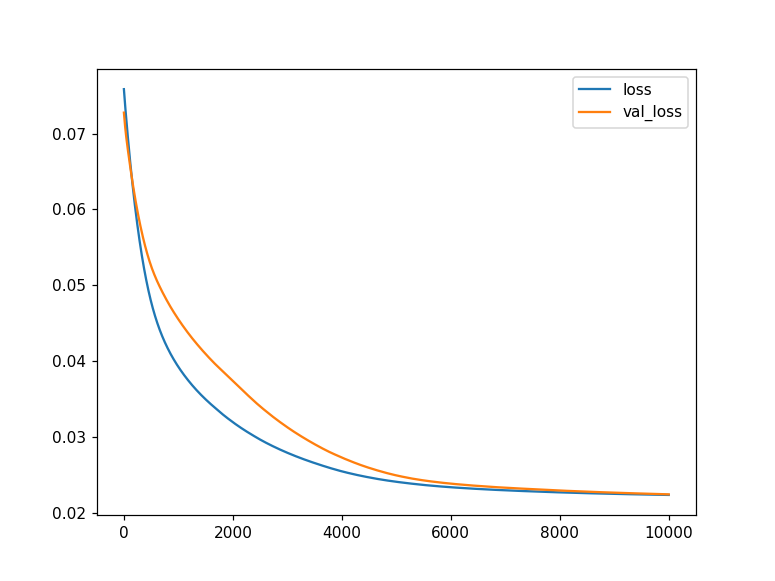

In [18]:
plt.figure()
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()
#plt.savefig('loss.jpg')

In [19]:
#模型训练结束后，预测是基于最终的一组参数，但可能效果最好的参数是前面的某一组，这里读取效果最好的参数进行预测
model.load_weights(checkpoint_save_path_transfer_free)
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

-1.5298248e-36 -0.37829068
-5.385289e-32 -0.3982663
-0.31016365 -0.48648018


In [20]:
y_train_predict_scaled = model.predict(x_train)
y_train_predict_scaled = np.array(y_train_predict_scaled).flatten()
y_test_predict_scaled = model.predict(x_test)
y_test_predict_scaled = np.array(y_test_predict_scaled).flatten()
print(y_train.shape)
print(y_train_predict_scaled.shape)
y_train_invers = np.array(scaler.inverse_transform(y_train)).flatten()
y_test_invers = np.array(scaler.inverse_transform(y_test)).flatten()
y_train_predict_invers = np.array(scaler.inverse_transform(y_train_predict_scaled.reshape(-1,1))).flatten()#按scaler2回到原来参数
y_test_predict_invers  = np.array(scaler.inverse_transform(y_test_predict_scaled.reshape(-1,1))).flatten()
print(y_train_invers.shape,y_test_invers.shape,y_train_predict_invers.shape,y_test_predict_invers.shape)


(300,)
(300,)
(300,) (75,) (300,) (75,)


<IPython.core.display.Javascript object>


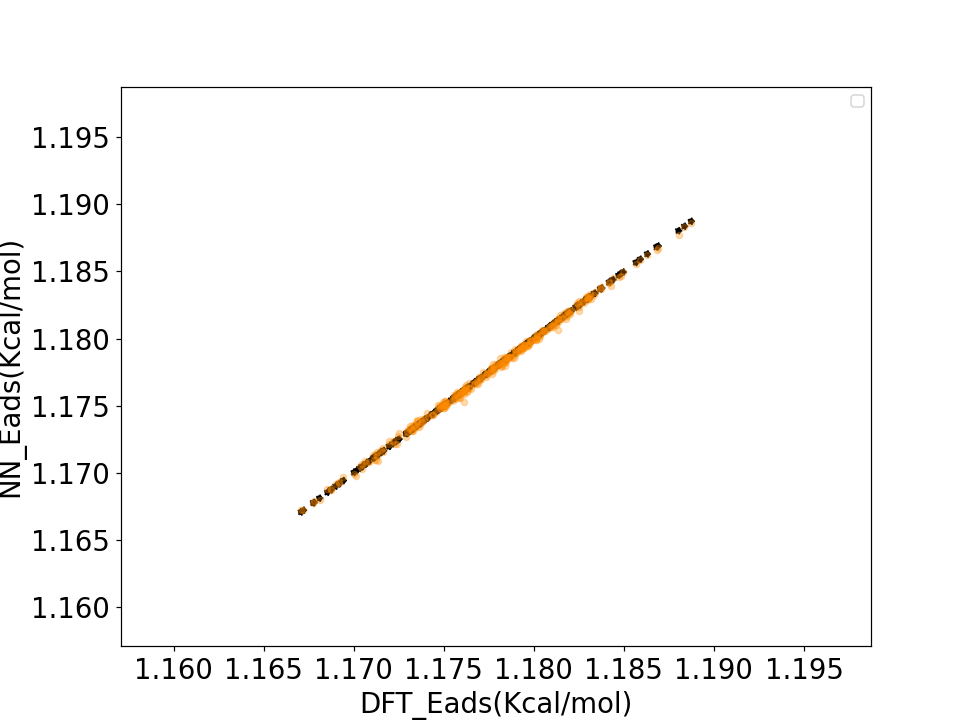

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [21]:
plt.figure(figsize=(8,6))
scale = 0.01
plt.xlim(min(y_train_invers)-scale,max(y_train_invers)+scale)
plt.ylim(min(y_train_invers)-scale,max(y_train_invers)+scale)

plt.scatter(y_train_invers,y_train_invers, color='black', s=16,linestyle='dotted')
plt.scatter(y_train_invers, y_train_predict_invers, s=16, alpha=0.3,color='darkorange')

plt.xlabel('DFT_Eads(Kcal/mol)',fontsize=18)
plt.ylabel('NN_Eads(Kcal/mol)',fontsize=18)

x1 = np.arange(min(y_train_invers),max(y_train_invers),0.5)
# plt.plot(x1,x1-3.6,label='y=x-3.6')
plt.legend()

plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18)
plt.legend()
plt.savefig('./C-O_bond_train.png')

<IPython.core.display.Javascript object>


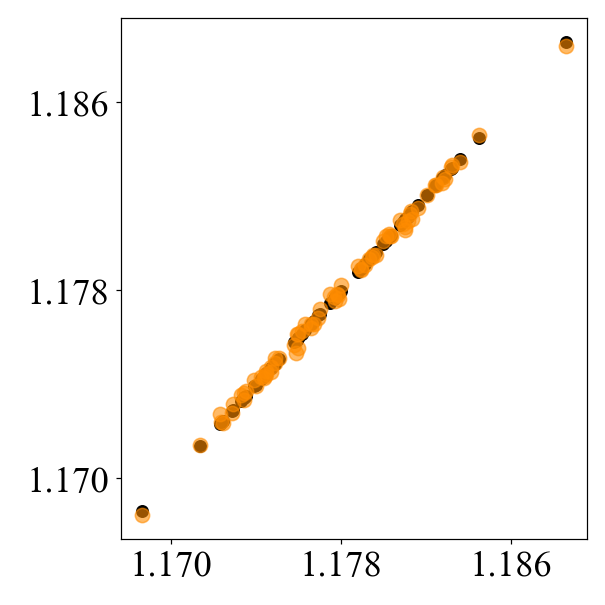

In [22]:
plt.figure(num=3,figsize=(5,5))
plt.rc('font',family='Times New Roman') 

plt.scatter(y_test_invers,y_test_invers, color='black', s=56
#             ,linestyle='dotted'
           )
plt.scatter(y_test_invers,y_test_predict_invers, s=88, alpha=0.6,color='darkorange')

scale = 0.002
# plt.xlim(min(y_test_invers)-scale,max(y_test_invers)+scale)
# plt.ylim(min(y_test_invers)-scale,max(y_test_invers)+scale)

# plt.xlabel('DFT',fontsize=24)
# plt.ylabel('NN',fontsize=24)

plt.xticks(np.arange(1.17,1.19,0.008),fontsize=24,rotation=0)
plt.yticks(np.arange(1.17,1.19,0.008),fontsize=24)
plt.tight_layout()
plt.savefig('./C-O_bond_test.png', dpi=168, bbox_inches='tight')

In [23]:
import sklearn.metrics as sm
print("训练集------MAE: ",sm.mean_absolute_error(y_train_invers,y_train_predict_invers))
print("测试集------MAE: ",sm.mean_absolute_error(y_test_invers,y_test_predict_invers))
print("训练集------MSE: ",sm.mean_squared_error(y_train_invers,y_train_predict_invers))
print("测试集------MSE: ",sm.mean_squared_error(y_test_invers,y_test_predict_invers))
print("训练集------RMSE: ",np.sqrt(sm.mean_squared_error(y_train_invers,y_train_predict_invers)))
print("测试集------RMSE:: ",np.sqrt(sm.mean_squared_error(y_test_invers,y_test_predict_invers)))
print("训练集------R2_score: ",sm.r2_score(y_train_invers,y_train_predict_invers))
print("测试集------R2_score:: ",sm.r2_score(y_test_invers,y_test_predict_invers))

训练集------MAE:  0.00014011897593179927
测试集------MAE:  0.00014570644470214057
训练集------MSE:  3.330804566588812e-08
测试集------MSE:  3.461946981919515e-08
训练集------RMSE:  0.00018250491956626298
测试集------RMSE::  0.0001860630802152731
训练集------R2_score:  0.9980833885116749
测试集------R2_score::  0.9974959941179234
